# Visualize results of Roslyn built-in code metrics analyzer

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
import json

## Prepare data

Extract values from file

In [ ]:
maintainability_index_data = {}
cyclomatic_data = {}
class_coupling_data = {}
loc_data = {}

i = 1
for filename in os.listdir("../"):
    if filename.endswith(".json") and filename != "public_analysis_results.json":  # Adjust for file format
        filepath = os.path.join("../", filename)
        with open(filepath, "r") as file:
            json_object = json.load(file)
            projects = [{"project_id": key, **value} for key, value in json_object.items()]
            for project in projects:
                # maintainability index
                score = project["MaintainabilityIndex"]
                project_id = project["project_id"]
                if project_id not in maintainability_index_data:
                    maintainability_index_data[project_id] = {}
                milestone = "Milestone " + str(i)
                maintainability_index_data[project_id][milestone] = score

                # cyclomatic complexity
                score = project["CyclomaticComplexity"]
                project_id = project["project_id"]
                if project_id not in cyclomatic_data:
                    cyclomatic_data[project_id] = {}
                milestone = "Milestone " + str(i)
                cyclomatic_data[project_id][milestone] = score

                # class coupling
                score = project["ClassCoupling"]
                project_id = project["project_id"]
                if project_id not in class_coupling_data:
                    class_coupling_data[project_id] = {}
                milestone = "Milestone " + str(i)
                class_coupling_data[project_id][milestone] = score

                # loc
                score = project["SourceLines"]
                project_id = project["project_id"]
                if project_id not in loc_data:
                    loc_data[project_id] = {}
                milestone = "Milestone " + str(i)
                loc_data[project_id][milestone] = score
        i += 1

print(maintainability_index_data)
print(cyclomatic_data)
print(class_coupling_data)
print(loc_data)


{996: {'Milestone 1': 96, 'Milestone 2': 96, 'Milestone 3': 96}, 993: {'Milestone 1': 88, 'Milestone 2': 81, 'Milestone 3': 84}, 992: {'Milestone 1': 81, 'Milestone 2': 84, 'Milestone 3': 82}, 989: {'Milestone 1': 80, 'Milestone 2': 79, 'Milestone 3': 80}, 899: {'Milestone 1': 86, 'Milestone 2': 86, 'Milestone 3': 82}, 898: {'Milestone 1': 86, 'Milestone 2': 86}, 897: {'Milestone 1': 85, 'Milestone 2': 85, 'Milestone 3': 85}, 896: {'Milestone 1': 83, 'Milestone 2': 83, 'Milestone 3': 83}, 986: {'Milestone 1': 84, 'Milestone 2': 82, 'Milestone 3': 82}, 842: {'Milestone 1': 94, 'Milestone 2': 86, 'Milestone 3': 86}, 1004: {'Milestone 1': 83, 'Milestone 2': 84, 'Milestone 3': 85}, 922: {'Milestone 1': 87, 'Milestone 2': 90, 'Milestone 3': 91}, 854: {'Milestone 1': 80, 'Milestone 2': 80, 'Milestone 3': 80}, 860: {'Milestone 1': 85, 'Milestone 2': 82, 'Milestone 3': 81}, 858: {'Milestone 1': 89, 'Milestone 2': 82, 'Milestone 3': 75}, 857: {'Milestone 1': 93, 'Milestone 2': 83, 'Milestone 3'

Convert data

In [11]:
maintainability_index_data = {k: v for k, v in maintainability_index_data.items() if any(vv != 0 for vv in v.values())}
df_maintainabilty = pd.DataFrame.from_dict(maintainability_index_data, orient='index')
df_maintainabilty = df_maintainabilty.sort_index()

cyclomatic_data = {k: v for k, v in cyclomatic_data.items() if any(vv != 0 for vv in v.values())}
df_cyclomatic = pd.DataFrame.from_dict(cyclomatic_data, orient='index')
df_cyclomatic = df_cyclomatic.sort_index()

class_coupling_data = {k: v for k, v in class_coupling_data.items() if any(vv != 0 for vv in v.values())}
df_class_coupling = pd.DataFrame.from_dict(class_coupling_data, orient='index')
df_class_coupling = df_cyclomatic.sort_index()

loc_data = {k: v for k, v in loc_data.items() if any(vv != 0 for vv in v.values())}
df_loc = pd.DataFrame.from_dict(loc_data, orient='index')
df_loc = df_loc.sort_index()

# Apply scaling to each metric dataframe
df_maintainabilty_normalized = df_maintainabilty.divide(df_loc / 1000, axis=0)
df_cylomatic_normalized = df_cyclomatic.divide(df_loc / 1000, axis=0)
df_class_coupling_normalized = df_class_coupling.divide(df_loc / 1000, axis=0)

# Plot data
## Maintainablity Index
### Bar chart

<Figure size 1000x500 with 0 Axes>

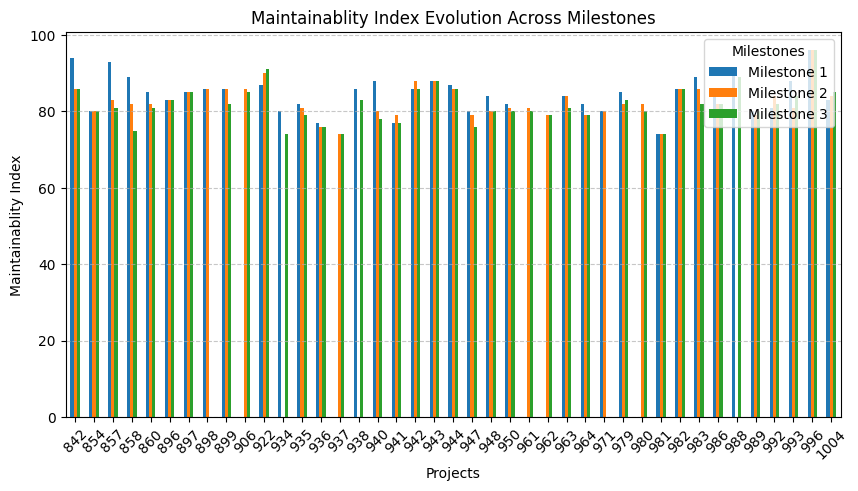

In [12]:
# Plot
plt.figure(figsize=(10, 5))
df_maintainabilty.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

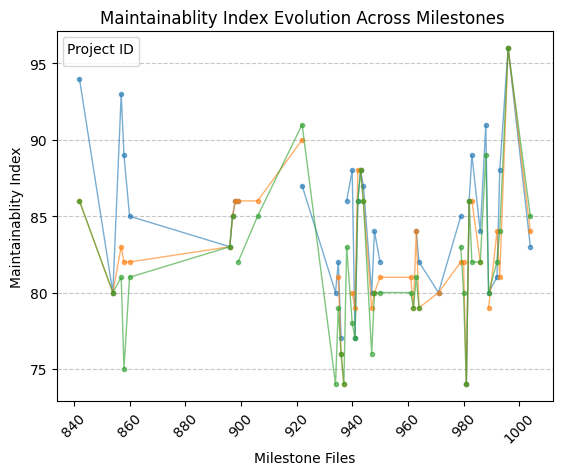

In [13]:
# Plot
plt.figure(figsize=(12, 6))
df_maintainabilty.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones ")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

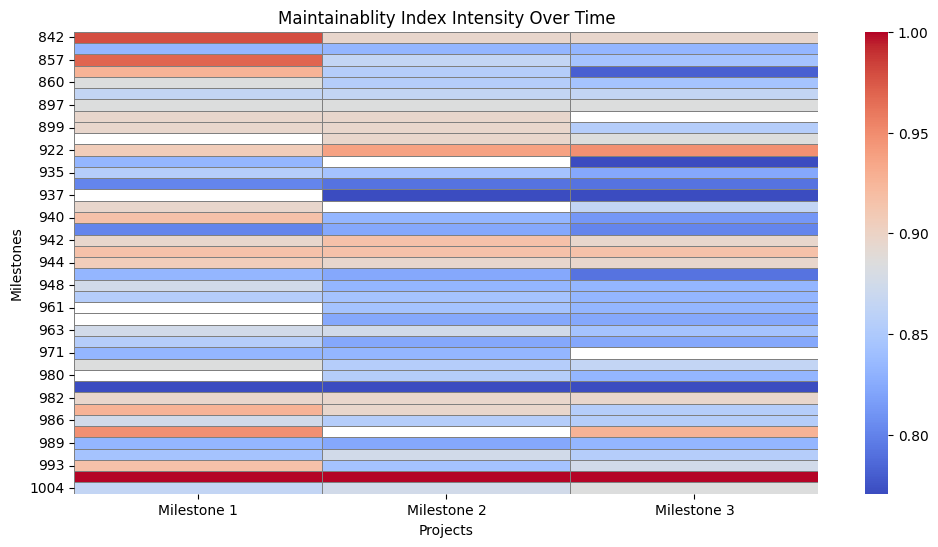

In [14]:
# Normalize values to improve visualization
df_normalized = df_maintainabilty / df_maintainabilty.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("Maintainablity Index Intensity Over Time")

# Show plot
plt.show()

### Line chart 2

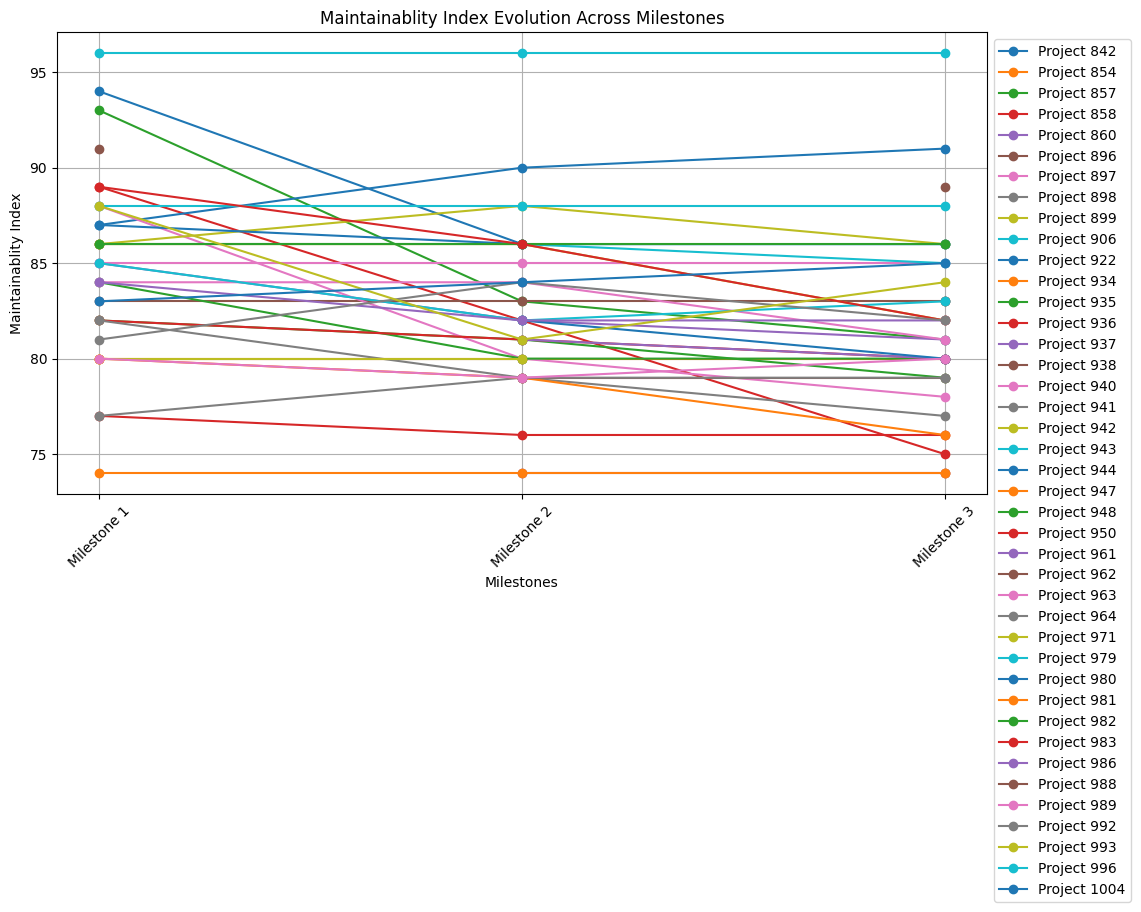

In [15]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_maintainabilty.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

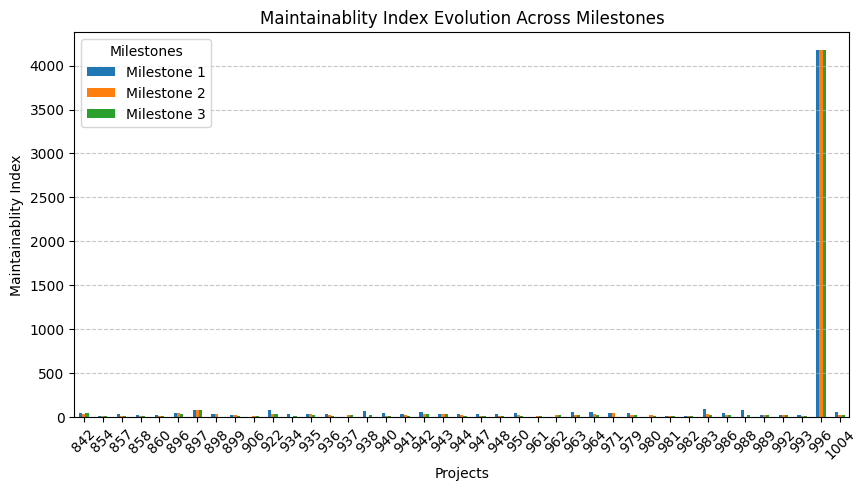

In [16]:
df_maintainabilty = df_maintainabilty / (df_maintainabilty.max() - df_maintainabilty.min())

# Plot
plt.figure(figsize=(10, 5))
df_maintainabilty_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Cyclomatic complexity
### Bar chart

<Figure size 1000x500 with 0 Axes>

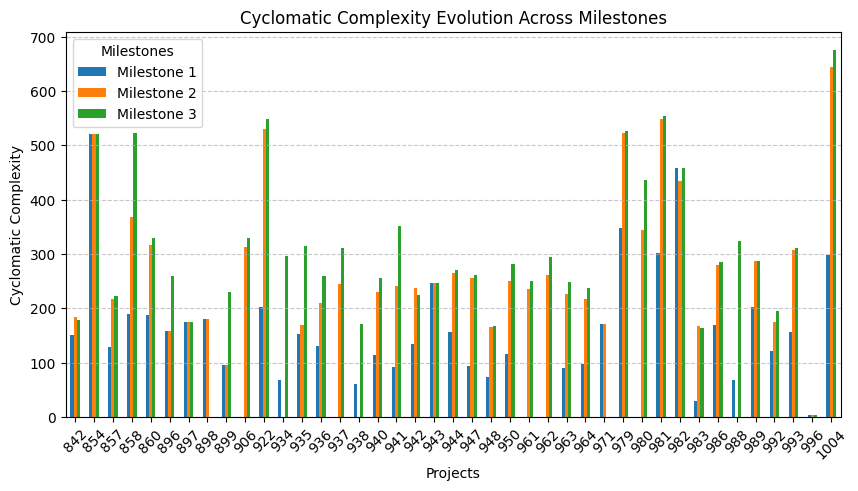

In [17]:
# Plot
plt.figure(figsize=(10, 5))
df_cyclomatic.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

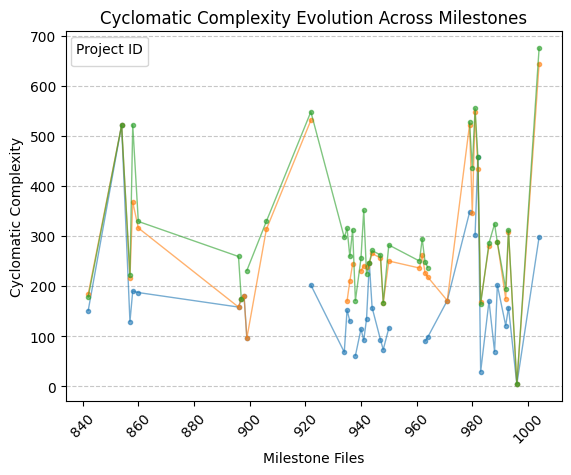

In [18]:
# Plot
plt.figure(figsize=(12, 6))
df_cyclomatic.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

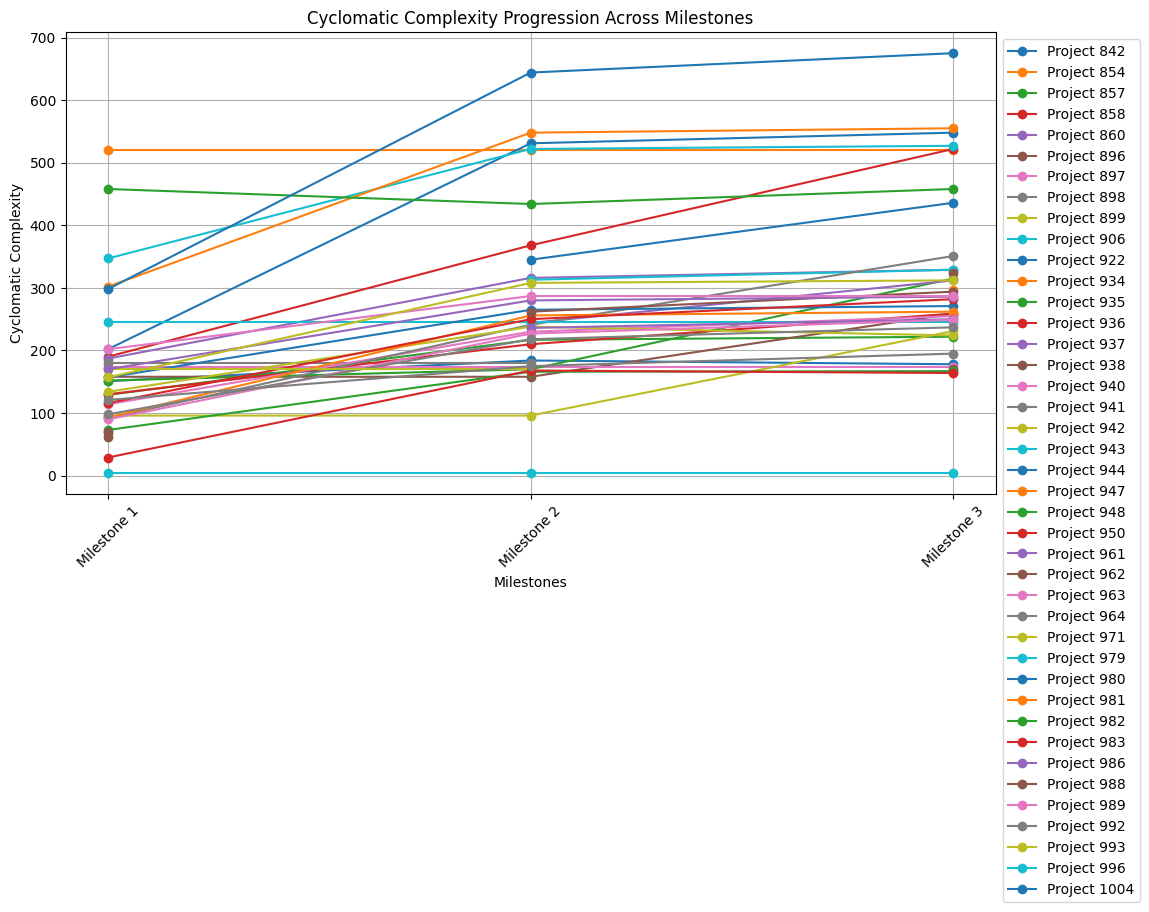

In [19]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_cyclomatic.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

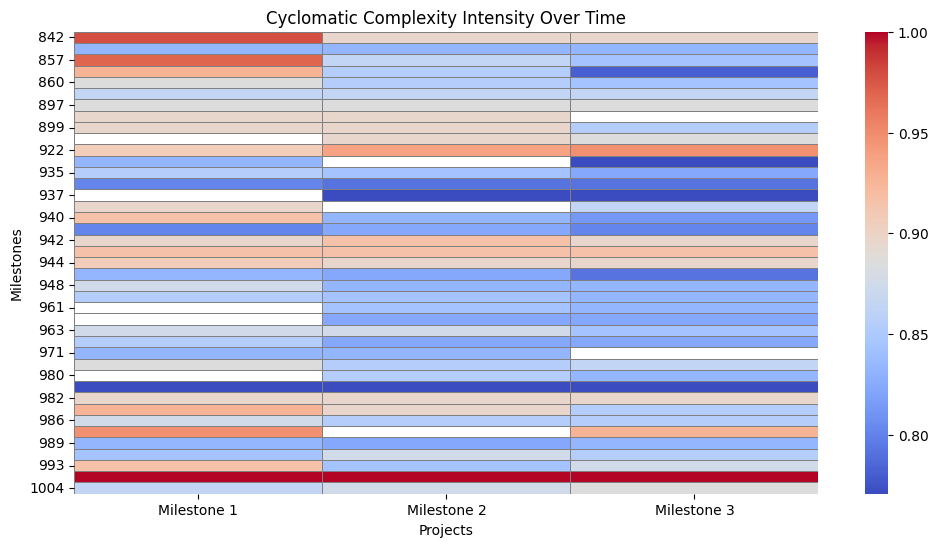

In [20]:
# Normalize values to improve visualization
df_normalized = df_maintainabilty / df_maintainabilty.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("Cyclomatic Complexity Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

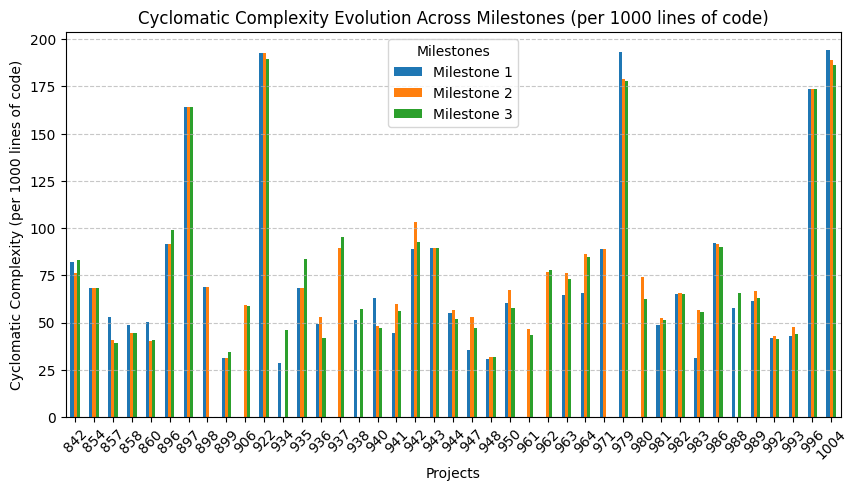

In [21]:
df_cyclomatic = df_cyclomatic / (df_cyclomatic.max() - df_cyclomatic.min())

# Plot
plt.figure(figsize=(10, 5))
df_cylomatic_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Cyclomatic Complexity (per 1000 lines of code)")
plt.title("Cyclomatic Complexity Evolution Across Milestones (per 1000 lines of code)")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Class coupling

### Bar chart

<Figure size 1000x500 with 0 Axes>

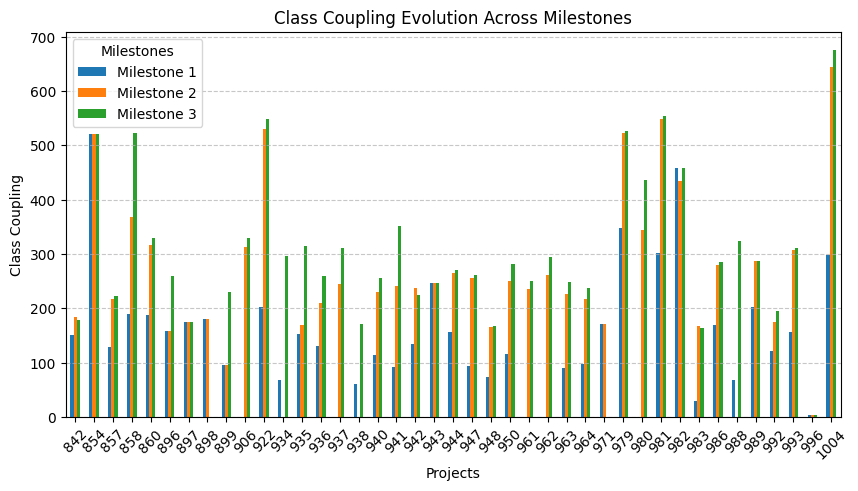

In [22]:
# Plot
plt.figure(figsize=(10, 5))
df_class_coupling.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

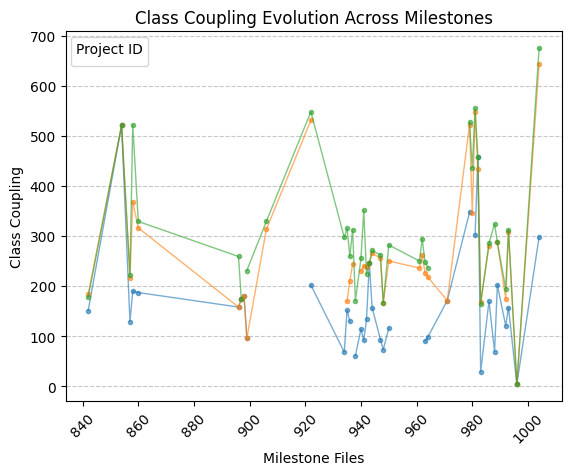

In [23]:
# Plot
plt.figure(figsize=(12, 6))
df_class_coupling.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

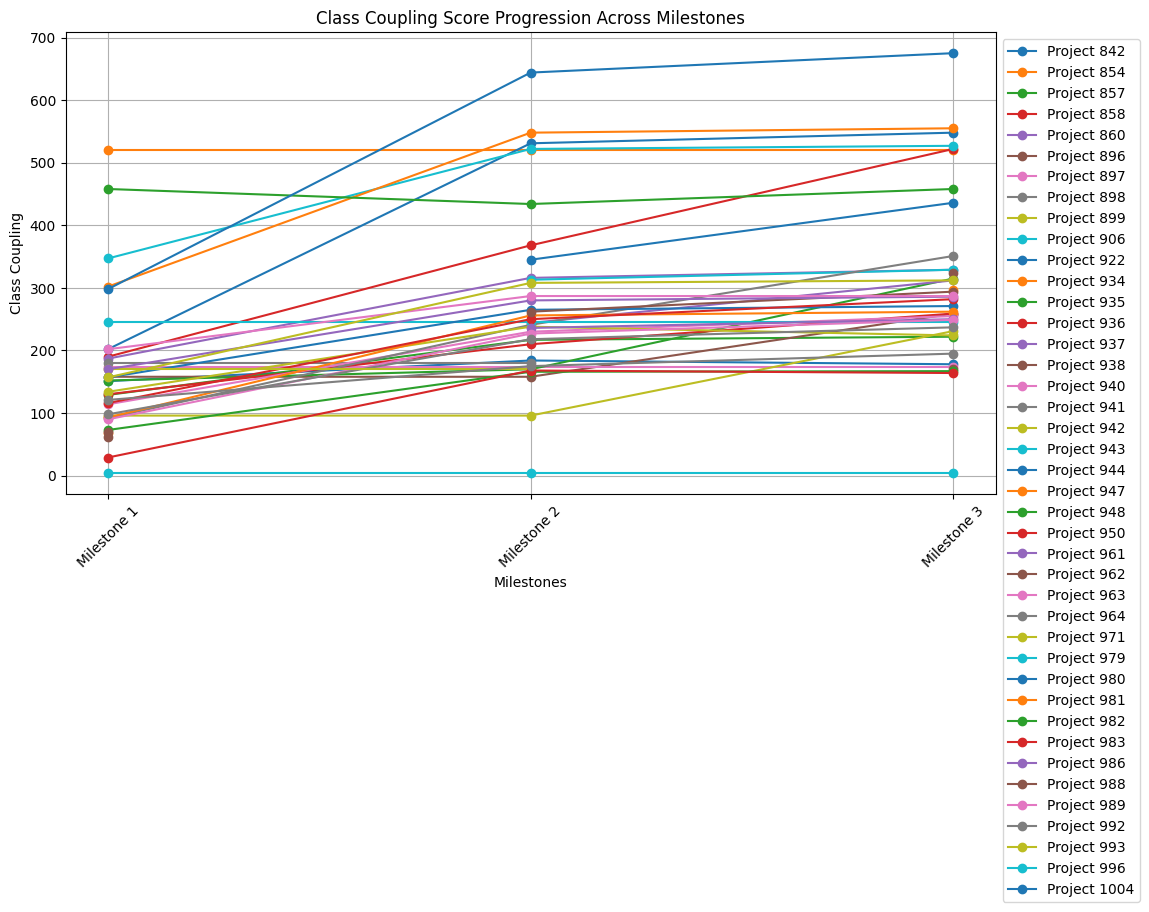

In [24]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_class_coupling.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

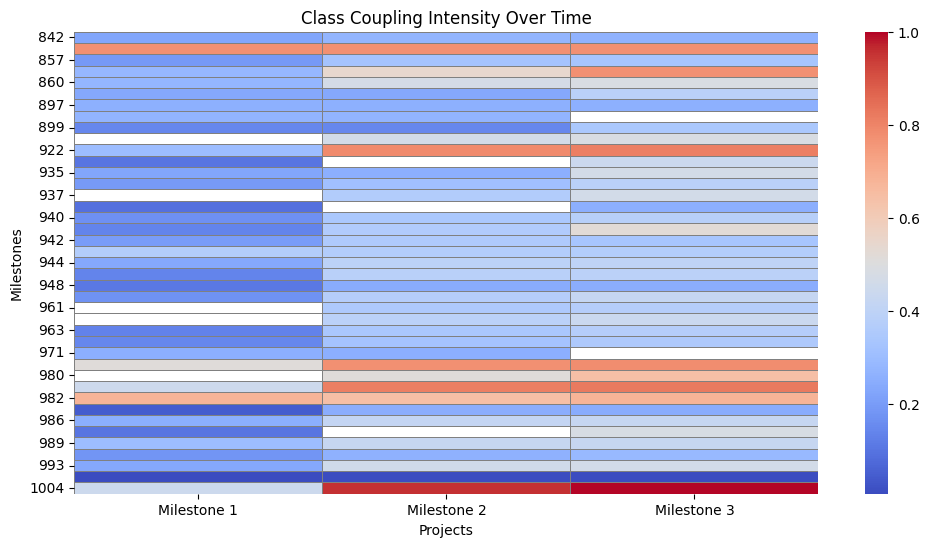

In [25]:
# Normalize values to improve visualization
df_normalized = df_class_coupling / df_class_coupling.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("Class Coupling Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

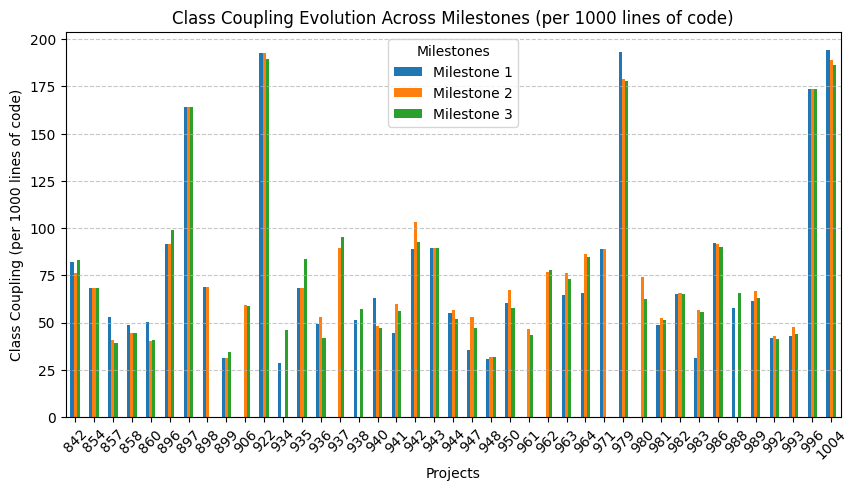

In [26]:
df_cyclomatic = df_cyclomatic / (df_cyclomatic.max() - df_cyclomatic.min())

# Plot
plt.figure(figsize=(10, 5))
df_class_coupling_normalized.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Class Coupling (per 1000 lines of code)")
plt.title("Class Coupling Evolution Across Milestones (per 1000 lines of code)")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()